In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Load the dataset
train_data = pd.read_csv('F:/prodigy/PRODIGY_ML_01/train.csv')
test_data = pd.read_csv('F:/prodigy/PRODIGY_ML_01/test.csv')

# Combine train and test data for preprocessing
all_data = pd.concat([train_data, test_data], ignore_index=True)  # Reset index to avoid duplication

# Select the relevant features and target variable
numerical_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
target = 'SalePrice'

In [34]:
# Fill missing values with 'Missing' for categorical features
all_data[categorical_features] = all_data[categorical_features].fillna('Missing')

# Fill missing values with median for numerical features
all_data[numerical_features] = all_data[numerical_features].fillna(all_data[numerical_features].median())

# One-hot encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(all_data[categorical_features]))
encoded_data.columns = encoder.get_feature_names_out(categorical_features)
encoded_data.index = all_data.index  # Ensure indices align

In [35]:
# Combine numerical and encoded categorical features
X = pd.concat([all_data[numerical_features], encoded_data], axis=1)

# Restore indices for splitting
train_idx = train_data.index
test_idx = test_data.index

# Split the data into training and testing sets
X_train = X.iloc[train_idx].copy()
X_test = X.iloc[test_idx].copy()
y_train = train_data[target]

In [36]:
# Standardize numerical features
scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12740\1255296476.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.37033344 -0.48251191  0.51501256 ...  1.56964722 -0.83278768
 -0.49393395]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12740\1255296476.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.16377912  0.16377912  0.16377912 ...  1.39002276 -1.06246453
  0.16377912]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, numerical_features] = scaler.fit_transform(X_train[numerical_features])
C:\Users\Nimra Waqar\AppData\Local\Temp\ipykernel_12740\1255296476.py:3: FutureWarning: Setting an item of

Predictions on the test set:
[204608. 201156. 216236. ... 213308. 290196. 149812.]


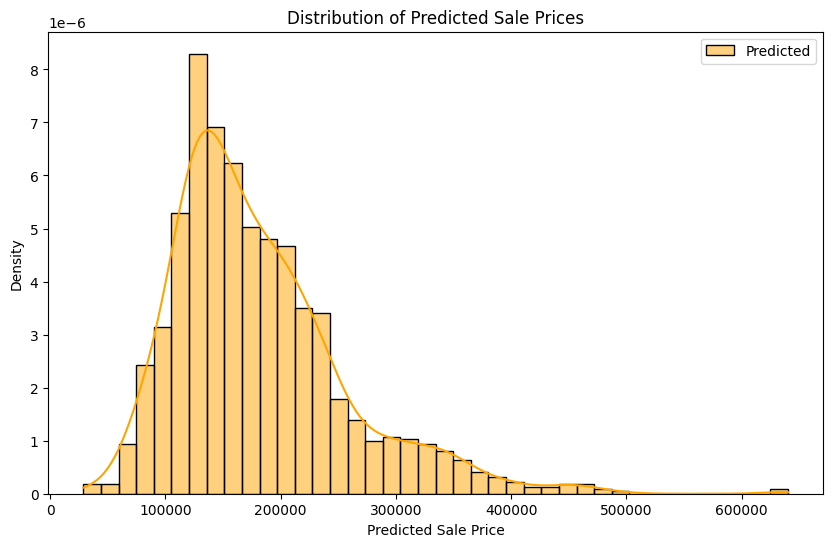

In [37]:

# Visualization
if target in test_data.columns:
    y_test = test_data[target]
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Scatter plot of actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.title('Actual vs Predicted Sale Price')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
    plt.show()

    # Distribution plot of actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test, kde=True, color='blue', label='Actual', stat='density')
    sns.histplot(y_pred, kde=True, color='orange', label='Predicted', stat='density')
    plt.xlabel('Sale Price')
    plt.ylabel('Density')
    plt.title('Distribution of Actual and Predicted Sale Prices')
    plt.legend()
    plt.show()

    # Residual plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple', stat='density')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Distribution of Residuals')
    plt.show()

    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
else:
    print('Predictions on the test set:')
    print(y_pred)

    # Distribution plot of predicted prices
    plt.figure(figsize=(10, 6))
    sns.histplot(y_pred, kde=True, color='orange', label='Predicted', stat='density')
    plt.xlabel('Predicted Sale Price')
    plt.ylabel('Density')
    plt.title('Distribution of Predicted Sale Prices')
    plt.legend()
    plt.show()
